# Exercícios da Aula 1 - Edmur C. Neto - 12558492

1 - Gere dados a partir de uma distribuição de Poisson. Varie a taxas $\lambda$ no intervalo [1,10] e mostre o gráfico da média em função da variância.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import iqr
from scipy.stats import pearsonr, spearmanr


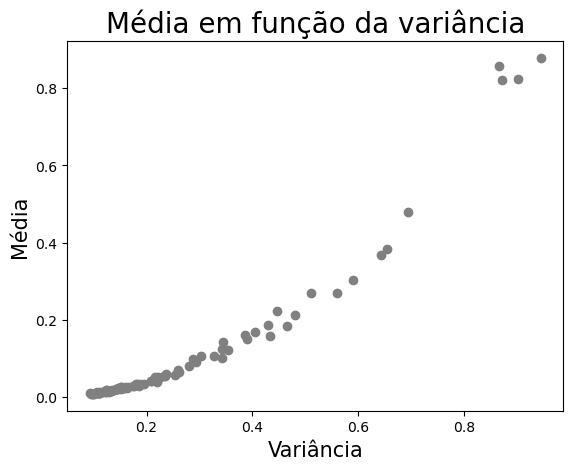

In [3]:
i = 1
media = []
var = []

while i < 10:

    lamb = i
    beta = 1.0/lamb
    X = np.random.exponential(beta, 500)
    media.append(np.mean(X))
    var.append(np.var(X))
    
    i = i + 0.1

#Função para plotar o fitting da relação
# def funtion_fitting(x, a, b, c):
#     f = a *x ** 2.0 + b * x + c
#     return f

# #Curva do fitting
# parametros_inicias = [1,0,0]
# parametros_otimizados, covariância = curve_fit(funtion_fitting, var, media, p0=parametros_inicias)
#  plt.plot(var, funtion_fitting(np.array(range(len(var))), *parametros_otimizados), color="red", 
#        label=f"Função {parametros_otimizados[0]} x² + {parametros_otimizados[1]} x + {parametros_otimizados[2]}")

plt.scatter(media, var, color="gray")
plt.xlabel("Variância", fontsize=15)
plt.ylabel("Média", fontsize=15)
plt.title("Média em função da variância", fontsize=20)

plt.show()


2 - Considere os dados da Iris. Calcule a média, variância e IQR para cada atributo.

In [4]:
df_iris = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/iris.csv")

media = []
variancia = []
IQR = []
nome = []

for i in df_iris.columns[0:df_iris.shape[1]-1]:
    nome.append(i)
    media.append(np.mean(df_iris[i]))
    variancia.append(np.var(df_iris[i]))
    IQR.append(iqr(df_iris[i]))
    
dados = {
    "Colunas": nome,
    "Médias": media,
    "Variâncias": variancia,
    "IQR's": IQR
}

parametros = pd.DataFrame(dados)

parametros.head()
    
        

,Colunas,Médias,Variâncias,IQR's
0,sepal_length,5.843333,0.681122,1.3
1,sepal_width,3.054000,0.186751,0.5
2,petal_length,3.758667,3.092425,3.5
3,petal_width,1.198667,0.578532,1.5


3 - Obtenha o boxplot de todas as variáveis da flor Iris, para cada espécie.

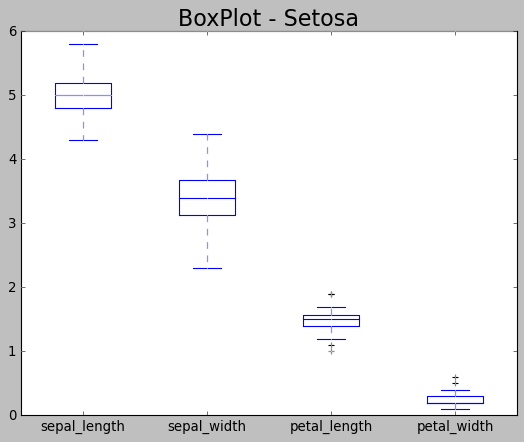

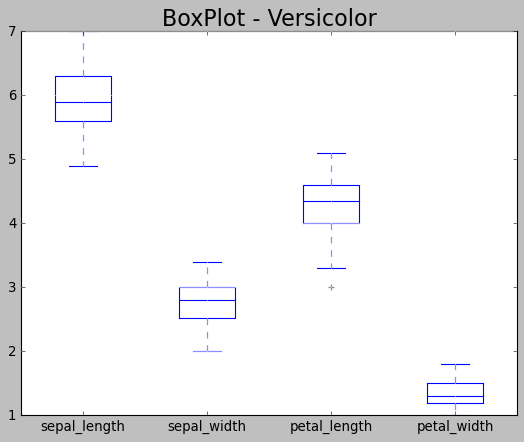

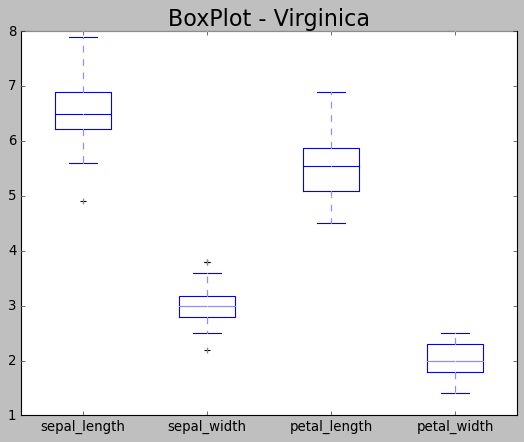

In [46]:
#Separar os dados com base nas espécies

setosa_dados = df_iris[df_iris["species"] == "setosa"]
versicolor_dados = df_iris[df_iris["species"] == "versicolor"]
virginica_dados = df_iris[df_iris["species"] == "virginica"]
atributos = []

for i in df_iris.columns[0:df_iris.shape[1]-1]:
    atributos.append(i)

plt.style.use("classic")
plt.grid(color="w", linestyle = "solid")

plt.subplot(1, 1, 1)
setosa_dados.boxplot(atributos, color="black" )
plt.title("BoxPlot - Setosa",  fontsize = 20)
plt.show()

plt.style.use("classic")
plt.grid(color="w", linestyle = "solid")

plt.subplot(1, 1, 1)
versicolor_dados.boxplot(atributos, color="black")
plt.title("BoxPlot - Versicolor", fontsize = 20)
plt.show()

plt.style.use("classic")
plt.grid(color="w", linestyle = "solid")

plt.subplot(1, 1, 1)
virginica_dados.boxplot(atributos, color="black")
plt.title("BoxPlot - Virginica",  fontsize = 20)
plt.show()




4 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.

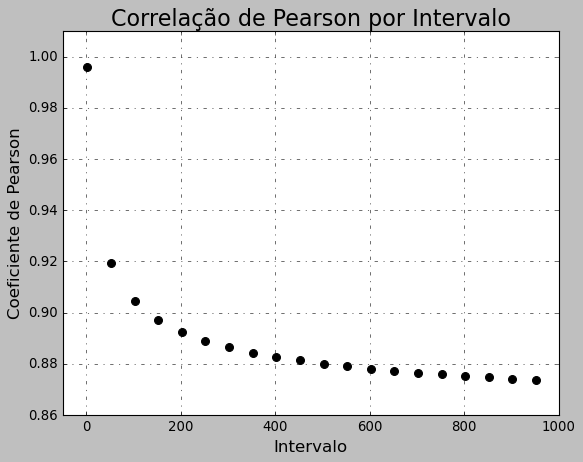

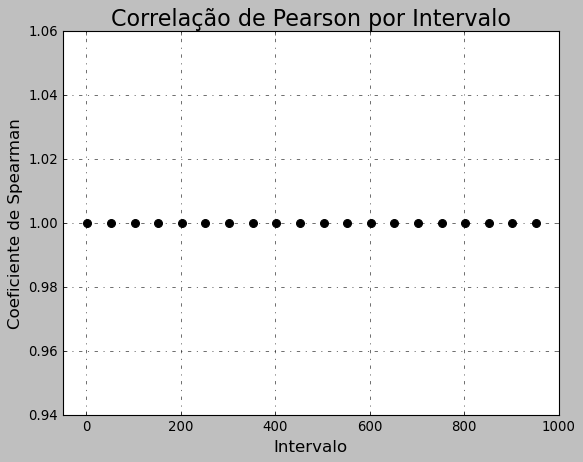

In [71]:
pearson = []
spearman = []
intervalo = []

for i in range(2,1000,50):
    X = np.linspace(1, i, 1000)
    Y = np.log(X)
    corr, p_value = pearsonr(X,Y)
    corrs, s_value = spearmanr(X,Y)
    corr = int(corr*10000)/10000
    corrs = int(corrs*10000)/10000
    pearson.append(corr)
    spearman.append(corrs)
    intervalo.append(i)

plt.grid(color="black", linestyle="dashdot")
plt.scatter(intervalo, pearson, marker="o", s=50, color="black")
plt.title("Correlação de Pearson por Intervalo", fontsize=20)
plt.ylabel("Coeficiente de Pearson", fontsize=15)
plt.xlabel("Intervalo", fontsize=15)
plt.xlim(-50)
plt.ylim(0.86, 1.01)
plt.show()


plt.grid(color="black", linestyle="dashdot")
plt.scatter(intervalo, spearman, marker="o", s=50, color="black", )
plt.title("Correlação de Pearson por Intervalo", fontsize=20)
plt.ylabel("Coeficiente de Spearman", fontsize=15)
plt.xlabel("Intervalo", fontsize=15)
plt.xlim(-50)   
plt.show()


5 - Considere o código acima que mostra como a correlação de Pearson muda com a inclusão de ruídos. Modifique a função para $Y = 0.5*X +$ ruído. Varie o ruído e calcule os coeficientes de Pearson e Spearman, mostrando os respectivos scatterplots com os valores dos coeficientes (como feito no exemplo).

In [ ]:
X = np.linspace(-1,1, 100)
erro = np.random.uniform(-1,1,100) # ruído a ser incluído na relação linear.
for sigma in np.arange(0,2,0.2):
    Y = -0.8*X + erro*sigma
    plt.plot(X,Y, 'ro')
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr*100)/100
    string = 'corr = '+ str(corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string, fontsize=15)
    plt.show(True)